In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it_prior_m.json"
script_name = "../scripts/run_fineweb1B_adamw_classic_fista_momentum_l1.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

Some files are missing: 
{'attn_fista_adamw-lr-0.001-warm-up-cosine-f13e08ad63f2b931ce21e5df1d77007c.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-d408c4d4d34f2b819a67e3f2d9fb25dd.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-1fd8f9a12ea8174b51a738ad33ad46ef.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-a4608407869dd59184fc6a18edd1db66.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-db08d73532e26459b9b09f8cbf7c3060.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-ab867f9c375b4e301a424998b253995b.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-8a9af19050e620fb41969506aac38bf9.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-21e37feb4272ef0c217a3dd4e38c628e.json'}
{'attn_max_iter': '20', 'attn_momentum': 'prior_m', 'lr': '0.001', 'momentum': 'False', 'mu_frac': '0.5', 'rho_over_lr': '100', 'warm_start': 'False'}
{'attn_max_iter': '20', 'attn_momentum': 'prior_m', 'lr': '0.001', 'momentum': 'False', 'mu_frac': '0.1', 'rho_over_lr': '100', 'warm_start': 'False'}
{'attn_max_iter'

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.615291,7.610608,7.615235,4947968.0,2011136.00,2.000634e+06,20,prior_m,0.001,False,0.001,0.5,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,8.379760,8.354076,8.371221,9764864.0,6815744.00,6.929297e+06,20,prior_m,0.001,False,0.001,10,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.622556,7.575130,7.620841,1433600.0,669696.00,6.720943e+05,20,prior_m,0.001,False,0.005,0.5,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.703438,3.691706,3.691706,140.0,45.75,5.349179e+01,20,prior_m,0.001,False,0.75,0.5,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,9.266865,9.089454,9.251362,5341184.0,3784704.00,3.654251e+06,20,prior_m,0.001,False,0.001,5,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


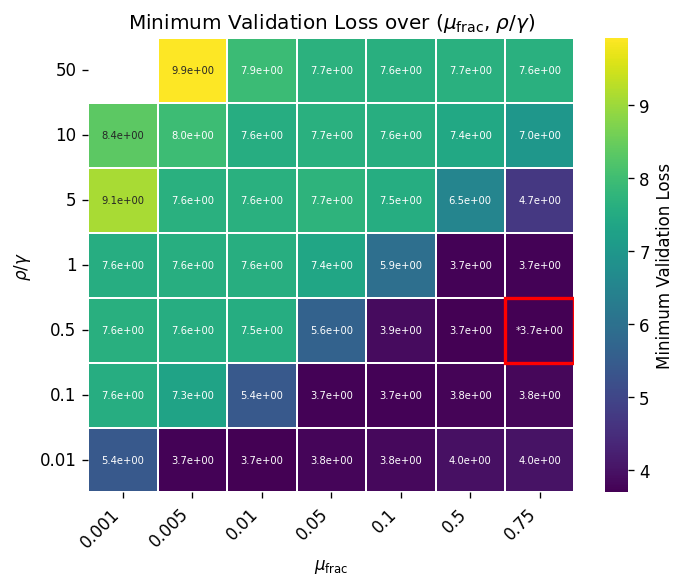

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


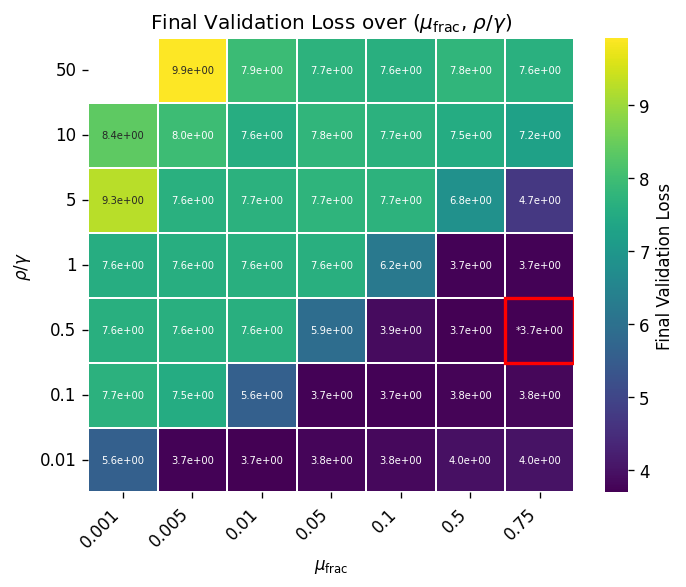

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss  kq_max mu_frac rho_over_lr
0      3.691706  140.00    0.75         0.5
1      3.712061  150.00    0.01        0.01
2      3.712174  245.00     0.5         0.5
3      3.718075  406.00   0.005        0.01
4      3.719327  304.00    0.05         0.1
5      3.720150  191.00     0.1         0.1
6      3.720807  524.00     0.5           1
7      3.720917  354.00    0.75           1
8      3.760763   54.50     0.5         0.1
9      3.774474   54.25    0.05        0.01


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


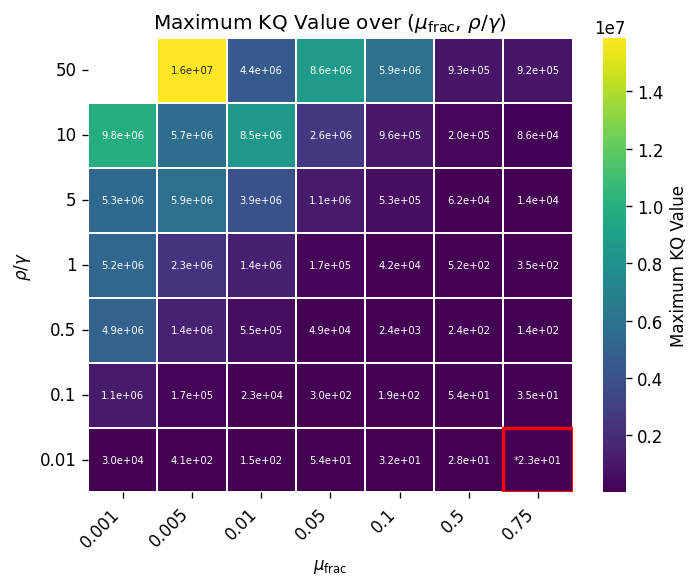

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


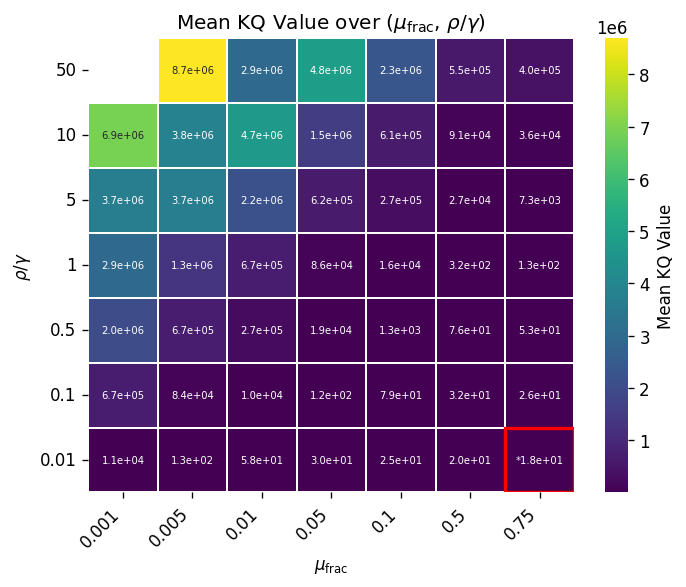

In [9]:
plot_heatmat_grid(df, value="kq_mean")